In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
#Let us first observe the area type feature
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Let's start our Data Cleaning

In [7]:
# We are going to drop the columns that we do not need.
df2 = df.drop(['area_type', 'society','balcony', 'availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# Check the amount of empty values we have in the dataset
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

We see the null values from the filtered dataset above, so the next thing to do is to either fill in those cells or remove their rows completely. But since the values are not much, we can afford to remove them.

In [9]:
# Removing the empty values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
# Lets check how many rows are now available
df3.shape

(13246, 5)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

The next step is to extract the number of bedrooms from the column above as integers.

### Feature Engineering

In [12]:
#We create a column 'bhk' to store the extracted number of rooms
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
# df['bhk'] will be added to the df3 table
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


The next step is to check the total_sqft 

In [14]:
df3['total_sqft'].describe

<bound method NDFrame.describe of 0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object>

So we have to convert it to a float type

Firstly, some of the cells are ranges (e.g '2400 - 3000', '4000 - 5500').

In [15]:
sp = df3['total_sqft'].apply(lambda x: x.split('-'))

In [16]:
cond = sp.apply(lambda x: len(x)>1)
df3['total_sqft'][cond].head(10)

30     2100 - 2850
122    3067 - 8156
137    1042 - 1105
165    1145 - 1340
188    1015 - 1540
549    1195 - 1440
661    1120 - 1145
672    3090 - 5002
772    1160 - 1195
850    1115 - 1130
Name: total_sqft, dtype: object

In [17]:
# we'll create a function to find the average of the range.
def float_conv(x):
    values_ = x.split('-')
    avg = (float(values_[0]) + float(values_[1]))/2
    return avg      
    

In [18]:
df3['total_sqft'][cond] = df3['total_sqft'][cond].apply(float_conv)

In [19]:
# next, we create a function to see other inputs that don't have the correct units.
def check_float(y):
    try:
        float(y)
    except:
        return False
    return True

In [20]:
# We name other units as "other_units"
other_units = df3['total_sqft'][df3['total_sqft'].apply(check_float) != True ]
other_units[:5]

410     34.46Sq. Meter
648          4125Perch
775      1000Sq. Meter
872      1100Sq. Yards
1019         5.31Acres
Name: total_sqft, dtype: object

 1 Square meter = 10.76 Square feet <br>
 1 Square yard = 9 Square feet <br>
 1 Acre = 43560 Square feet <br>
 1 ground = 2400 Square feet <br>
 1 cent = 435.6 Square feet <br>
 1 Guntha = 1089 Square feet <br>
 1 Perch = 272.25 Square feet

In [21]:
# For the units not in sqyuare feet, we create a function to convert each available unit to Sq feet.
def convert_to_sq_feet(x):
    numbers = []
    for content in x:
        if not content.isalpha():
            numbers.append(content)
        else:
            break
    if "." in numbers:
        value = float(''.join(numbers))
    else:
        value = int("".join(numbers))
    
    if "Sq. Meter" in x:
        return value*10.76
    if "Sq. Yards" in x:
        return value*9
    if "Acres" in x:
        return value*43560
    if "Grounds" in x:
        return value*2400
    if "Cents" in x:
        return value * 435.6
    if "Guntha" in x:
        return value * 1089
    if "Perch" in x:
        return value*272.25
    
    
    

In [22]:
other_units_converted = df3['total_sqft'][df3['total_sqft'].apply(check_float) != True ].apply(convert_to_sq_feet).round(2)
other_units_converted[:5]

410         370.79
648     1123031.25
775       10760.00
872        9900.00
1019     231303.60
Name: total_sqft, dtype: float64

In [23]:
other_units = other_units_converted

In [24]:
df3['total_sqft'][other_units.index] = other_units

In [25]:
# Now we can change all the elements of the column to float type.
df3['total_sqft'] = df3['total_sqft'].astype('float')

In [26]:
df3['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [27]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


## Feature Engineering 

Next we will add a new feature for price per square feet

In [28]:
#The unit of the price is Lakh, so we are going to multiply the price by 100,000
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Next up, we want to perform one hot encoding

In [29]:
# So let's check the amount of locations in the dataset.
len(df3.location.unique())

1304

We can see that we have 1304 unique locations, if we perform one hot encoding with this number <br>
we're going to have too many columns. So let's reduce the dimensions by grouping locations with<br>
less than 10 occurences into a single group called "others".

In [30]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [31]:
locations_less_than_10 = location_stats[location_stats <= 10]

In [32]:
df3.location = df3.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)

In [33]:
df3['location'][df3['location'] == 'other'].value_counts()

other    2896
Name: location, dtype: int64

In [34]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal 

The next step is to remove outliers from the dataset.

First, when considering bedrooms and the square feet, a bedroom takes a minimum of 300 square feet, so anything less than that is unrealistic.

In [35]:
# The dataframe would now be the inverted of the bedrooms with less than 300 sqft. 
df3 = df3[~((df3['total_sqft']/df3['bhk']) < 300)]

In [36]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


Next we'll remove the 'price_per_sqft' outliers with Standard deviation and Mean. 

In [37]:
df3.price_per_sqft.describe()

count     12498.000000
mean       6298.900042
std        4169.130133
min           2.257423
25%        4203.458878
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

From the values above, we can see that the minimum and maximum values are unrealistic. 

In [38]:
def remove_pps_outliers (df):
    df_new = pd.DataFrame()
    #We iterate through each of the locations and find their mean and std.
    for loc,val in df.groupby('location'):
        mean_ = np.mean(val.price_per_sqft)
        std = np.std(val.price_per_sqft)
        #Finding the range of the values we want.
        reduced_df = val[(val['price_per_sqft'] > (mean_ - std)) & (val['price_per_sqft'] < (mean_ + std))]
        df_new = pd.concat([df_new,reduced_df], ignore_index = True)
    return df_new

In [39]:
df4 = remove_pps_outliers(df3)

In [40]:
df4.location.apply(lambda x: x.strip())

0        Devarachikkanahalli
1        Devarachikkanahalli
2        Devarachikkanahalli
3        Devarachikkanahalli
4        Devarachikkanahalli
                ...         
10266                  other
10267                  other
10268                  other
10269                  other
10270                  other
Name: location, Length: 10271, dtype: object

In [41]:
df4.location = df4.location.apply(lambda x: x.strip())

In [42]:
df4.location[0]

'Devarachikkanahalli'

Let's see how 2 BHK and 3 BHK looks like

In [43]:
def bedroom_scatter_plot(df,location):
    bhk2 = df[(df.bhk == 2) & (df.location == location)]
    bhk3 = df[(df.bhk ==3) & (df.location == location)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price , color = 'red', label = '2 Bedroom', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker = '*', color = 'blue', label = '3 Bedroom', s=50)
    plt.xlabel('Square Feet Area')
    plt.ylabel('Price (Lakh Indian Rupees)')
    plt.title(location + ' Comparison')
    plt.legend
    

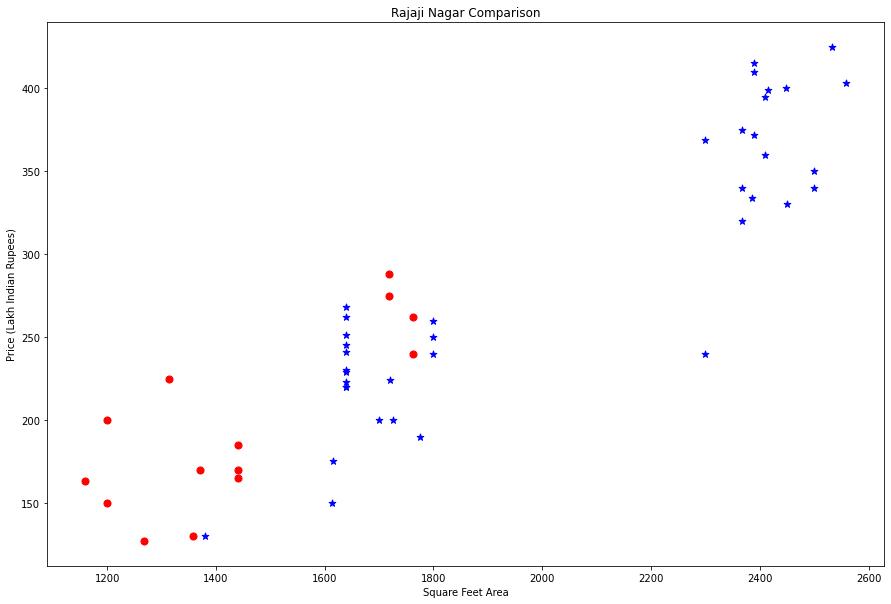

In [44]:
bedroom_scatter_plot(df4,'Rajaji Nagar')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

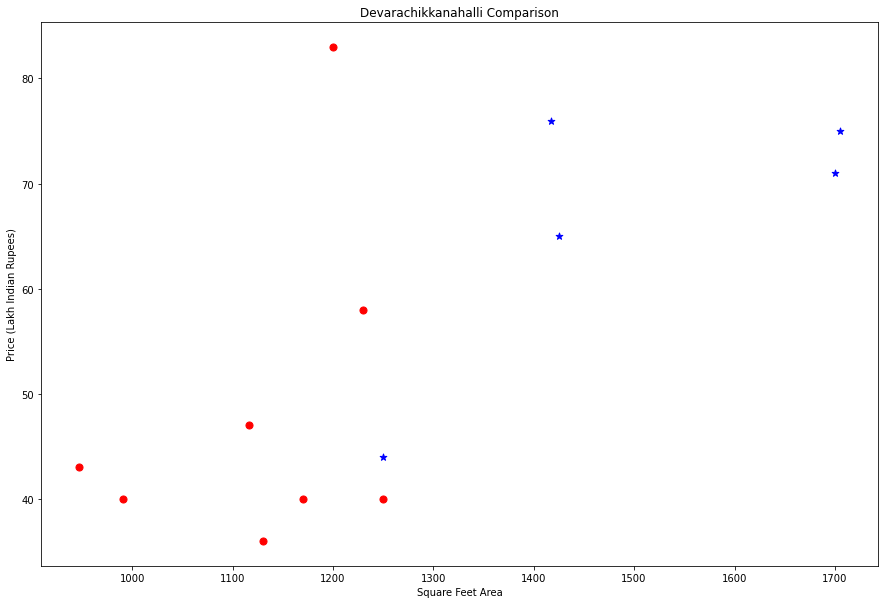

In [45]:
bedroom_scatter_plot(df4,'Devarachikkanahalli')

In [46]:
def remove_outliers(df):
    exclude_indices = np.array([])
    for location_main,location_df in df.groupby('location'):
        location_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            location_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = location_stats.get(bhk - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [47]:
df5 = remove_outliers(df4)

### For the 'Rajaji Nagar' location

#### Before outliers

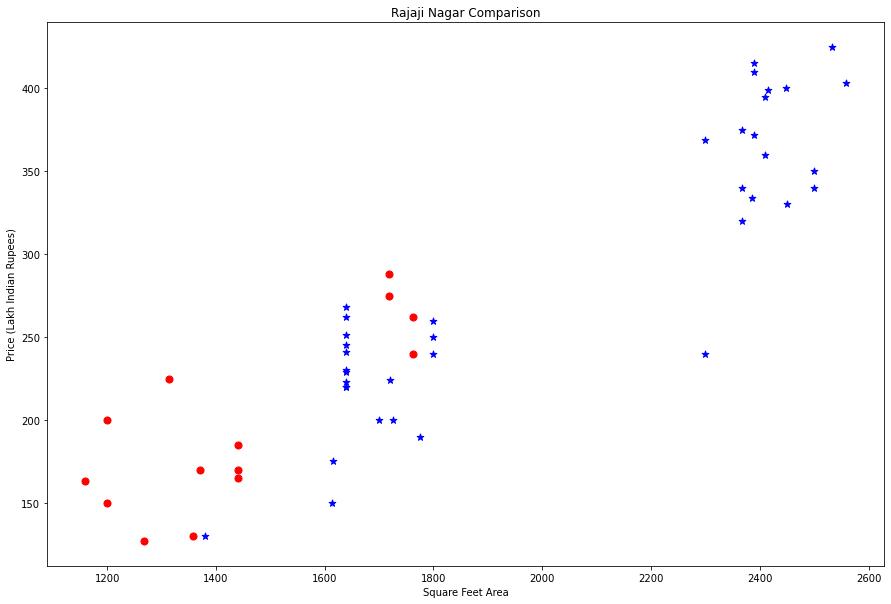

In [48]:
bedroom_scatter_plot(df4,"Rajaji Nagar")

#### After Outliers have been removed

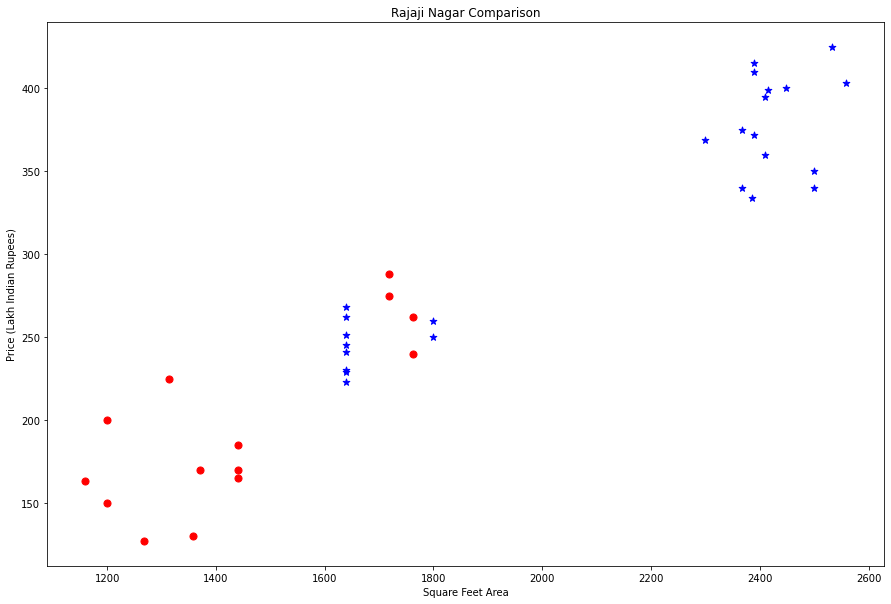

In [49]:
bedroom_scatter_plot(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

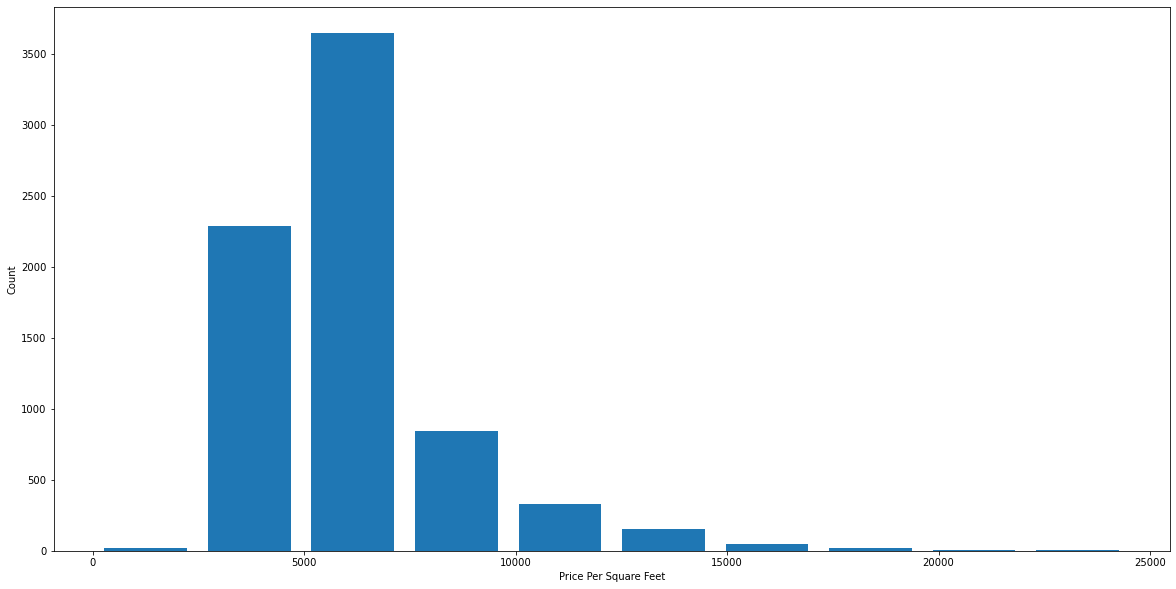

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

The next outliers that we have to consider are the ones with more Bathrooms than they should have.

Ideally a property would have the number of Bathrooms to be the same as the number of rooms, then in most cases a guest bathroom is available.<br>
So we'll consider properties with Bathrooms far higher than the number of Bedrooms to be outliers.

In [51]:
#Removing the Bathroom outliers
df6 = df5[df5.bath < df5.bhk+2]

In [52]:
#Now let's drop the size (since we already have the 'bhk' column) and price_per_sqft columns
df6.drop(['size','price_per_sqft'],axis= 'columns', inplace= True)

In [53]:
df6.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


Now we'll go into building the model

## One Hot Encoding for Location

In [54]:
dummies = pd.get_dummies(df6.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df7 = pd.concat([df6, dummies.drop('other',axis = 'columns')], axis = 'columns')

In [56]:
#After the one hot encoding operation for the location, let's drop the locations column
df8 = df7.drop('location', axis = 'columns')

In [57]:
df8.total_sqft.sort_values(ascending = False)

1382    653400.0
8428     30000.0
1383     26460.0
4911     12000.0
7190     11890.0
          ...   
2327       360.0
5867       360.0
8411       351.0
7845       350.0
5220       300.0
Name: total_sqft, Length: 7278, dtype: float64

In [58]:
df8.drop(1382, inplace = True)

## So now we'll build the Model

In [59]:
df8.shape

(7277, 245)

Now we'll split the dataset into the dependent and independent variables. i.e X and y

In [60]:
X = df8.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df8.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [62]:
y.shape

(7277,)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 10)


In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8586198723744304

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X,y, cv = cv )

array([0.73405208, 0.81473167, 0.81166034, 0.83756229, 0.79173182])

We can see that the result of the 5 iterations are okay. So now let's test other algorithms using GridSearchCV.

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def get_best_model(X,y):
    algorithms = {
        'linear regression':{
            'model':LinearRegression(),
            'params':{'normalize':[True,False]}
        },
        'lasso':{'model':Lasso(),
                'params':{
                    'alpha': [1,2],
                    'selection':['random','cyclic']
                }
                },
        'decision tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
    }
    
    scores = {}
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algorithm_name, details in algorithms.items():
        gs = GridSearchCV(details['model'],details['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores[algorithm_name] = {'best_score': gs.best_score_,
                                 'best_params': gs.best_params_}
    
    return pd.DataFrame(scores)

In [67]:
get_best_model(X,y)

,linear regression,lasso,decision tree
best_score,0.797948,0.664382,0.686153
best_params,{'normalize': True},"{'alpha': 2, 'selection': 'random'}","{'criterion': 'friedman_mse', 'splitter': 'best'}"


From the table above, we see that Linear regression gives us the best score, so we'll use that.

### Now let's test the model

In [68]:
def get_price(location,sqft,bath,bhk):
    if location.strip() not in X.columns:
        return 'Location not found'
    location_index = np.where(X.columns == location.strip())[0][0]
    
    values = np.zeros(X.shape[1])
    values[0] = sqft
    values[1]= bath
    values[2] = bhk
    if location_index >= 0:
        values[location_index] = 1
        
    return lr_clf.predict([values])[0]

In [69]:
get_price('1st Phase JP Nagar',1000, 2, 2)

85.91071169289441

In [70]:
get_price('1st Phase JP Nagar',1000, 3, 3)

97.76622581808233

In [71]:
get_price('Indira Nagar',1000, 3, 3)

193.35329504117033

In [72]:
import pickle
with open ("benglore_home_prices_model.pickle",'wb') as f:
    pickle.dump(lr_clf,f)

In [74]:
import json
columns = {'data_columns': [col.lower() for col in X.columns]}

with open ("columns.json", "w") as f:
    f.write(json.dumps(columns))